### **1. Loading Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [ ]:
import warnings
warnings.filterwarnings("ignore")

### **2. Loading Data**

In [ ]:
iris = pd.read_csv("/content/IRIS.csv")

In [ ]:
iris.head(1000)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
iris.shape

(150, 5)

### **3. Initial Statistics**

In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

### **4. Data Visualization**

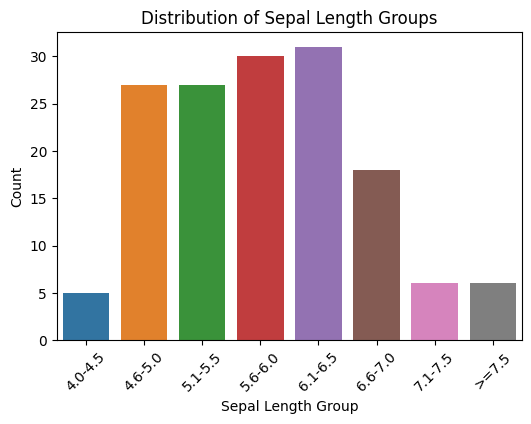

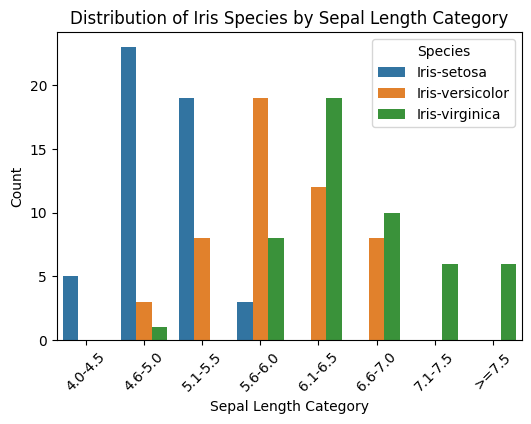

In [ ]:
## Bar chart for Distribution of Sepal Length Groups

bins = [4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, float('inf')]
labels = ['4.0-4.5', '4.6-5.0', '5.1-5.5', '5.6-6.0', '6.1-6.5', '6.6-7.0', '7.1-7.5', '>=7.5']

iris_sepal = iris.copy()

iris_sepal['sepal_length_group'] = pd.cut(iris_sepal['sepal_length'], bins=bins, labels=labels)

plt.figure(figsize=(6, 4))
sns.countplot(data=iris_sepal, x='sepal_length_group', order=labels)
plt.xlabel('Sepal Length Group')
plt.ylabel('Count')
plt.title('Distribution of Sepal Length Groups')
plt.xticks(rotation=45)
plt.show()


## Bar chart for Distribution of Iris Species by Sepal Length Category

plt.figure(figsize=(6, 4))
sns.countplot(x='sepal_length_group', hue='species', data=iris_sepal)
plt.xlabel('Sepal Length Category')
plt.ylabel('Count')
plt.title('Distribution of Iris Species by Sepal Length Category')
plt.xticks(rotation=45)

# Show the plot
plt.legend(title='Species', loc='upper right')
plt.show()

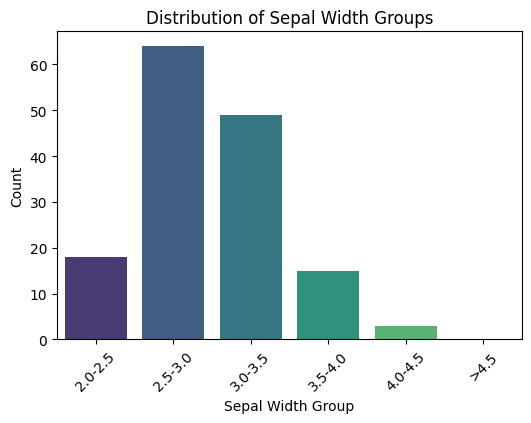

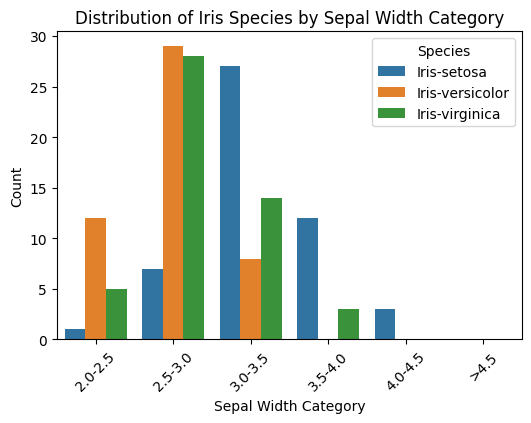

In [ ]:
## Bar chart for Distribution of Sepal Width Groups
bins = [2.0, 2.5, 3.0, 3.5, 4.0, 4.5, float('inf')]
labels = ["2.0-2.5","2.5-3.0","3.0-3.5","3.5-4.0","4.0-4.5",">4.5"]


iris_sepal['sepal_width_group'] = pd.cut(iris_sepal['sepal_width'], bins=bins, labels=labels)

plt.figure(figsize=(6, 4))
sns.countplot(data=iris_sepal, x='sepal_width_group', order=labels, palette='viridis')
plt.xlabel('Sepal Width Group')
plt.ylabel('Count')
plt.title('Distribution of Sepal Width Groups')
plt.xticks(rotation=45)
plt.show()


## Bar chart for Distribution of Iris Species by Sepal Width Category

plt.figure(figsize=(6, 4))
sns.countplot(x='sepal_width_group', hue='species', data=iris_sepal)
plt.xlabel('Sepal Width Category')
plt.ylabel('Count')
plt.title('Distribution of Iris Species by Sepal Width Category')
plt.xticks(rotation=45)

# Show the plot
plt.legend(title='Species', loc='upper right')
plt.show()

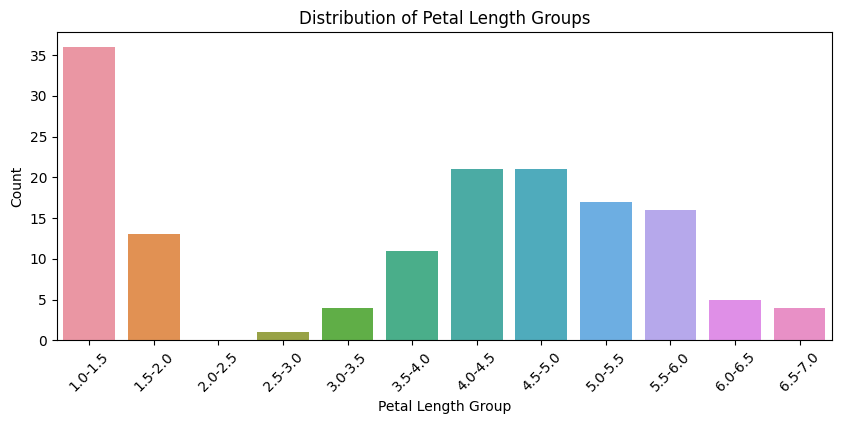

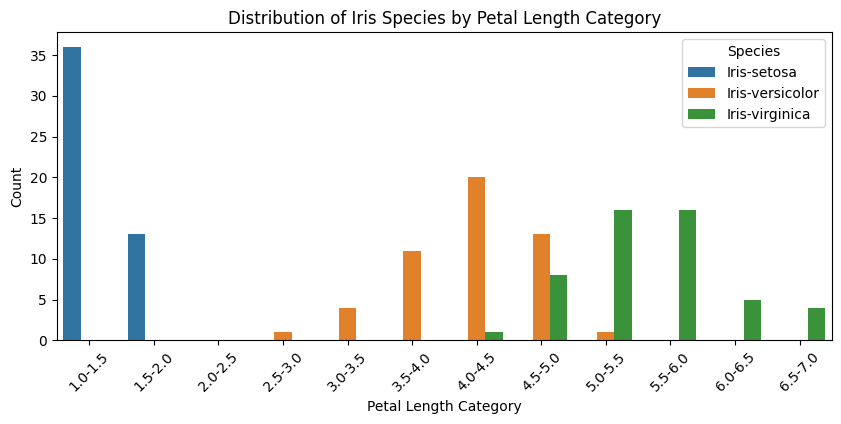

In [ ]:
## Bar chart for Distribution of Petal Length Groups
bins = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0]
labels = ["1.0-1.5","1.5-2.0","2.0-2.5","2.5-3.0","3.0-3.5","3.5-4.0","4.0-4.5","4.5-5.0","5.0-5.5","5.5-6.0","6.0-6.5","6.5-7.0"]

iris_sepal = iris.copy()

iris_sepal['petal_length_group'] = pd.cut(iris_sepal['petal_length'], bins=bins, labels=labels)

plt.figure(figsize=(10, 4))
sns.countplot(data=iris_sepal, x='petal_length_group', order=labels)
plt.xlabel('Petal Length Group')
plt.ylabel('Count')
plt.title('Distribution of Petal Length Groups')
plt.xticks(rotation=45)
plt.show()

## Bar chart for Distribution of Iris Species by Petal Width Category

plt.figure(figsize=(10, 4))
sns.countplot(x='petal_length_group', hue='species', data=iris_sepal)
plt.xlabel('Petal Length Category')
plt.ylabel('Count')
plt.title('Distribution of Iris Species by Petal Length Category')
plt.xticks(rotation=45)

# Show the plot
plt.legend(title='Species', loc='upper right')
plt.show()

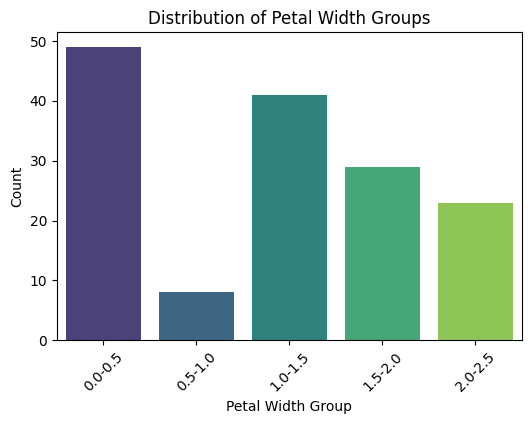

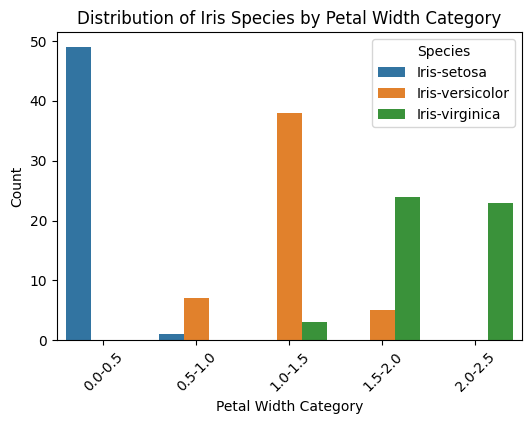

In [ ]:
## Bar chart for Distribution of Petal Width Groups
bins = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5]
labels = ["0.0-0.5","0.5-1.0","1.0-1.5","1.5-2.0","2.0-2.5"]

iris_sepal = iris.copy()

iris_sepal['petal_width_group'] = pd.cut(iris_sepal['petal_width'], bins=bins, labels=labels)

plt.figure(figsize=(6, 4))
sns.countplot(data=iris_sepal, x='petal_width_group', order=labels, palette='viridis')
plt.xlabel('Petal Width Group')
plt.ylabel('Count')
plt.title('Distribution of Petal Width Groups')
plt.xticks(rotation=45)
plt.show()

## Bar chart for Distribution of Iris Species by Petal Width Category

plt.figure(figsize=(6, 4))
sns.countplot(x='petal_width_group', hue='species', data=iris_sepal)
plt.xlabel('Petal Width Category')
plt.ylabel('Count')
plt.title('Distribution of Iris Species by Petal Width Category')
plt.xticks(rotation=45)

# Show the plot
plt.legend(title='Species', loc='upper right')
plt.show()

### **5. Feature Engineering**

In [ ]:
le = LabelEncoder()

iris["species"] = le.fit_transform(iris["species"])

### **6. Splitting Data into Training and Testing data**

In [ ]:
X = iris.drop(["species"],axis=1)
Y = iris["species"]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

### **7. Model Training and Evaluation**

In [ ]:
model = RandomForestClassifier()

model.fit(x_train,y_train)

model_train = model.predict(x_train)
model_pred_train = accuracy_score(model_train,y_train)
print("Accuracy Score of Training data:-",model_pred_train)

print("\n\n*************************\n\n")

model_test = model.predict(x_test)
model_pred_test = accuracy_score(model_test,y_test)
print("Accuracy Score of Testing data:-",model_pred_test)

print("\n\n*************************\n\n")

report = classification_report(y_test, model_test)
print(report)

Accuracy Score of Training data:- 1.0


*************************


Accuracy Score of Testing data:- 0.9666666666666667


*************************


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
xgb_clf = XGBClassifier()

xgb_clf.fit(x_train,y_train)

xgb_clf_train = xgb_clf.predict(x_train)
xgb_clf_pred_train = accuracy_score(xgb_clf_train,y_train)
print("Accuracy Score of Training data:-",xgb_clf_pred_train)

print("\n\n*************************\n\n")

xgb_clf_test = xgb_clf.predict(x_test)
xgb_clf_pred_test = accuracy_score(xgb_clf_test,y_test)
print("Accuracy Score of Testing data:-",xgb_clf_pred_test)

print("\n\n*************************\n\n")

report = classification_report(xgb_clf_test,y_test)
print(report)

Accuracy Score of Training data:- 1.0


*************************


Accuracy Score of Testing data:- 0.9666666666666667


*************************


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.92      1.00      0.96        12
           2       1.00      0.86      0.92         7

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
tree = DecisionTreeClassifier()

tree.fit(x_train,y_train)

tree_train = tree.predict(x_train)
tree_pred_train = accuracy_score(tree_train,y_train)
print("Accuracy Score of Training data:-",tree_pred_train)

print("\n\n*************************\n\n")

tree_test = tree.predict(x_test)
tree_pred_test = accuracy_score(tree_test,y_test)
print("Accuracy Score of Testing data:-",tree_pred_test)

print("\n\n*************************\n\n")

report = classification_report(tree_test,y_test)
print(report)

Accuracy Score of Training data:- 1.0


*************************


Accuracy Score of Testing data:- 0.9666666666666667


*************************


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.92      1.00      0.96        12
           2       1.00      0.86      0.92         7

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



### **We Will be taking Decision Tree Classifier for Input Prediction.**

### **8. Input Prediction**

In [ ]:
## Taking input from the user and predicting the output

sepal_length = float(input("Enter sepal length: "))
sepal_width = float(input("Enter sepal width: "))
petal_length = float(input("Enter petal length: "))
petal_width = float(input("Enter petal width: "))

user_input = np.array([[sepal_length, sepal_width, petal_length, petal_width]])

predicted_species = tree.predict(user_input)

print("\n")

if(predicted_species[0]==0):
  print("The Predicted species are: iris_septosa")
elif(predicted_species[0]==1):
  print("The Predicted species are: iris_versicolor")
elif(predicted_species[0]==2):
  print("The Predicted species are: iris_virginica")


Enter sepal length: 5.1
Enter sepal width: 3.5
Enter petal length: 1.4
Enter petal width: 0.2


The Predicted species are: iris_septosa
